In [2]:
## tools

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [ ]:
# created a tool
api_wrapper_arxiv =ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query Arxiv Papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [5]:
api_wrapper_wikipedia =WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Query Wikipedia Papers")
print(wikipedia.name)

wikipedia


In [6]:
arxiv.invoke("What is the latest reseach on quantum computing?")

'Published: 2011-04-21\nTitle: Graphene quantum dots for valley-based quantum computing: A feasibility study\nAuthors: G. Y. Wu, N. -Y. Lue, L. Chang\nSummary: At the center of quantum computing1 realization is the physical\nimplementation of qubits - two-state quantum information units. The rise of\ngraphene2 has opened a new door to the implementation. Because graphene\nelectrons simulate two-dimensional relativistic particles with two degenerate\nand independent energy valleys,3 a novel degree of fre'

In [8]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"] =  os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] =  os.getenv("GROQ_API_KEY")

In [9]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [10]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "Using Robots in Nursing Homes Linked to Higher Employee Retention, Better Patient Care\n\nMonday, January 6, 2025\n\nAI Slashes Cost and Time for Chip Design, but That Is Not All\n\nThursday, January 2, 2025\n\nArtificial Intelligence: Algorithms Improve Medical Image Analysis\n\nFriday, December 27, 2024\n\nCrossing the Uncanny Valley: Breakthrough in Technology for Lifelike Facial Expressions in Androids\n\nThursday, December 26, 2024\n\nWind Sensing by Biomimetic Flexible Flapping Wing With Strain Sensors [...] Tuesday, November 12, 2024\n\nGiving Robots Superhuman Vision Using Radio Signals\n\nMonday, November 11, 2024\n\nAI Can Detect Serious Neurologic Changes in Babies in the NICU Using Video Data Alone\nRobot That Watched Surgery Videos Performs With Skill of Human Doctor, Researchers Report\n\nThursday, November 7, 2024\n

In [11]:
# combineing all the tools in the list

tools = [arxiv, wikipedia, tavily]

In [14]:
#initialize llm model

from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

In [15]:
llm.invoke("What is AI?")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is AI?" Let me start by breaking down the term. AI stands for Artificial Intelligence, so I should explain what that means. I need to make sure I cover the basic definition but also give some context. Maybe start with a simple explanation: AI refers to machines or software that can perform tasks that typically require human intelligence.\n\nWait, but what are the key aspects of AI? There\'s machine learning, neural networks, and things like that. But the user might not know those terms, so I should explain them in simpler terms. Maybe mention that AI systems can learn from data, recognize patterns, make decisions, etc. But I should also mention the different types of AI, like narrow or general AI. Narrow AI is what we have now, like voice assistants, while general AI is more hypothetical, like human-level intelligence.\n\nHmm, I should also touch on how AI is used in real life. Examples like recommendation systems on Netflix

In [17]:
llm_with_tools = llm.bind_tools(tools=tools)

In [ ]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pd7t', 'function': {'arguments': '{"query": "recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 159, 'prompt_tokens': 323, 'total_tokens': 482, 'completion_time': 0.391946844, 'prompt_time': 0.083832167, 'queue_time': 0.676150288, 'total_time': 0.475779011}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d7f88ba5-15cc-4638-bbb4-e7be1cfea22a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_pd7t', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 159, 'total_tokens': 482})

In [19]:
llm_with_tools.invoke("What is the latest reseach on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3vae', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 178, 'prompt_tokens': 326, 'total_tokens': 504, 'completion_time': 0.431996843, 'prompt_time': 0.022817528, 'queue_time': 0.35915845900000004, 'total_time': 0.454814371}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e8bc1059-2079-4ec0-b462-e1adcfcbd293-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_3vae', 'type': 'tool_call'}], usage_metadata={'input_tokens': 326, 'output_tokens': 178, 'total_tokens': 504})

In [20]:
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fmt0', 'function': {'arguments': '{"query": "Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 288, 'prompt_tokens': 320, 'total_tokens': 608, 'completion_time': 0.72537145, 'prompt_time': 0.021547593, 'queue_time': 0.245372646, 'total_time': 0.746919043}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c65eb453-a300-40c0-9328-ca1346c8f1be-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'call_fmt0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 320, 'output_tokens': 288, 'total_tokens': 608})

In [ ]:
## workflow
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage #can be a Human msg or AI msg
from typing import Annotated #labeling
from langgraph.graph.message import add_messages #Reducers in langgraph
# reducer means, it will not over wite, but it will append


In [22]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    # tools: list[Annotated[AnyMessage, "tools"]]
    # tools_results: list[Annotated[AnyMessage, "tools_results"]]

In [23]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition


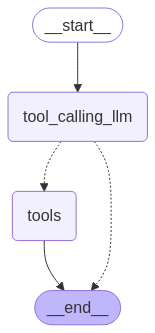

In [25]:
## node definantion
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## add edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
messages = graph.invoke({"messages": "1706.03762"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_db56)
 Call ID: call_db56
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [28]:
messages = graph.invoke({"messages": "Hi my name id Batul"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi my name id Batul
================================== Ai Message ==================================

Hello Batul! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific!


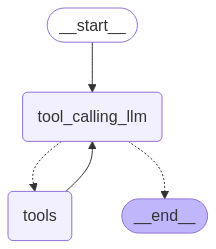

In [29]:
## node definantion
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## add edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
messages = graph.invoke({"messages": "What is the recent AI news and please tell me recent paper on Qunatum Computing"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and please tell me recent paper on Qunatum Computing
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_rma5)
 Call ID: call_rma5
  Args:
    query: recent AI news
  arxiv (call_60ev)
 Call ID: call_60ev
  Args:
    query: Quantum Computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest AI News, Analysis & Events", "url": "https://www.artificialintelligence-news.com/", "content": "Marketing Tech News\nApril 16, 2025\nOpenAI explores social platform following $40B funding round\n\nAI News\nApril 15, 2025\nMeta will train AI models using EU user data\n\nDeveloper Tech News\nApril 15, 2025\nMasquerading payment npm package installs backdoor\n\nTelecoms Tech News\nApril 15, 2025\nFCC chair calls EU satellite str